In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
import os



In [ ]:
df= pd.read_csv("/content/drive/MyDrive/GlobalAIHub/proje 1/insurance (1).csv") #verimizi drivedan çekelim
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info() # verimiz hakkında bilgi sahibi olalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns #veride bulunun parametreler

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.describe() #istatiksel değerleri öğrenelim

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe().T #mean ve ortanca değer birbirine yakınsa veri seti dağılımı dengelidir T=transpose

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.dtypes #verilerin veri tipini öğrenelim

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.shape #gözlem,değişken

(1338, 7)

In [ ]:
df.isnull().sum() #toplam null değerleri bastıralım

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.cov() #kovaryans hesabı

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [ ]:
df.corr() #korelasyon hesabı 

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


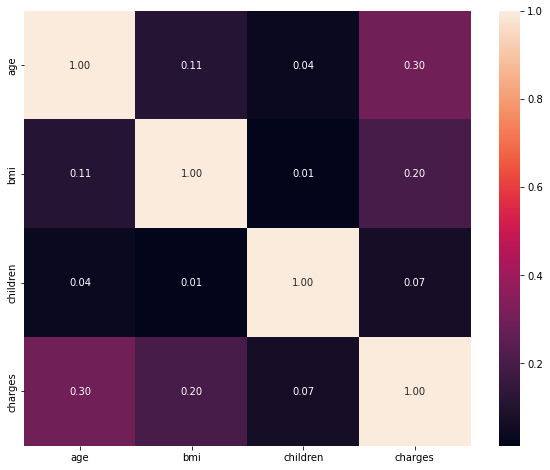

In [ ]:
import seaborn as sns
corr = df.corr()
fig, ax= plt.subplots(figsize=(10,8))
ax= sns.heatmap(corr, annot=True,
                fmt='.2f')
#korelasyon hesabımızı heatmap ile görselleştirelim.

Bize verilen kategorileri görselleştirelim. Bu görselleştirmede histogram grafiğinden faydalanalım.

In [ ]:
def plotHistogram(variable):
  # girdi: degisken/sütun ismi çıktı: ilgili değişkenin histogramı

  plt.figure()
  plt.hist(df[variable],bins=85, color= "orange")
  plt.xlabel(variable)
  plt.ylabel("Frequance") 
  plt.title("Veri Sıklığı - {}".format(variable))
  plt.show()

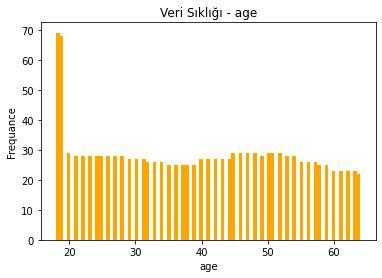

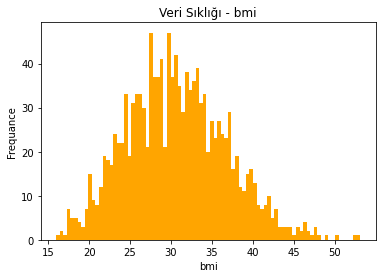

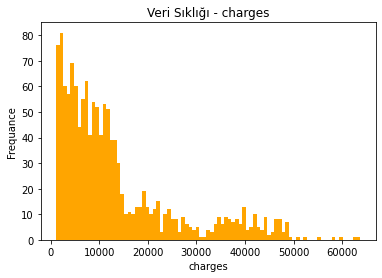

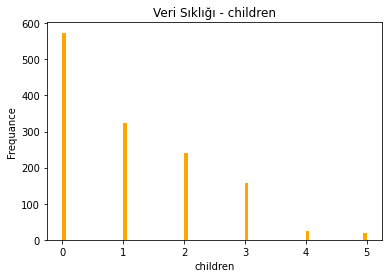

In [ ]:
sayisal_degisken= ["age", "bmi", "charges","children"]
for i in sayisal_degisken:
  plotHistogram(i)

20'li yaşlarda bulunan insan sayısı genele oranla daha fazladır.
BMI değeri 25-35 arasında sık olarak gözlenmektedir.
Harcamalara bakıldığında, 0-10000 arasında yapılan harcamaların 10000-60000 arasında yapılan harcama oranına göre daha fazla olduğu görülmektedir. 
Genel olarak az çocuklu aileler bulunmaktadır.

Verilerimizi sayısallaştırmak için Label Encoder'dan yararlanalım.
sex, smoker, region,children ve age verilerimizi sayısallaştıralım.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.sex.drop_duplicates())  #duplicates o özelliğe ait bir adet nesneyi alıyor, 1 kadın 1 erkek gibi
df.sex = le.transform(df.sex)   #label encoder yaparken en önemli özellik transform, kadına 0 erkeğe 1 diyerek sayısal değer veriyor 

le.fit(df.age.drop_duplicates()) 
df.age = le.transform(df.age)

le.fit(df.children.drop_duplicates()) 
df.children = le.transform(df.children)

le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

**BMI HESABI**

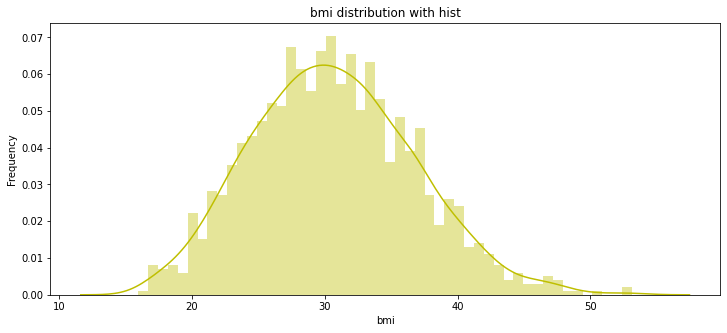

In [ ]:

def plot_hist(variable):
    plt.figure(figsize=(12,5))   # figsize ile tablonun boyutu belirlenir. 
    plt.xlabel(variable)    # x ve y eksenlerinin başlığı yazılır
    plt.ylabel("Frequency")
    plt.title(variable + " distribution with hist")
    sns.distplot(df[variable], bins=50, color='y')  #displot ile histogram grafiği oluşturduk
    plt.show()
    
plot_hist("bmi")

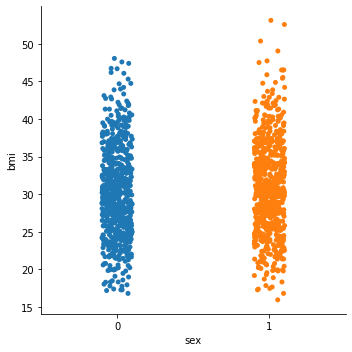

In [ ]:
sns.catplot(data=df, x="sex", hue = "sex", y="bmi") #catplot kullanarak bmi hesabımızı farklı bir grafik üzerinden dağılımını inceleyelim. 
#Kadın ve erkek olarak ayrıldığında bmi dağılımını görüyoruz.


**SMOKER & CHARGES İLİŞKİSİ**






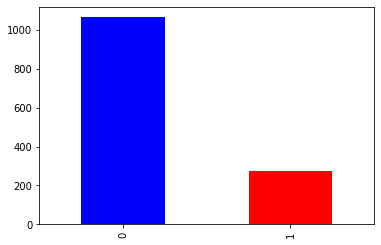

In [ ]:
df['smoker'].value_counts().plot(kind='bar',color=['blue','red']) #sigara içenler ile içmeyenleri bar plot ile görselleştirdik

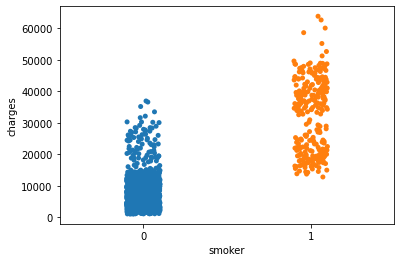

In [ ]:
sns.stripplot(x='smoker', y='charges',data=df) # kategoriye göre dağılımı gözlemlemek için stripplot çizdirdik

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

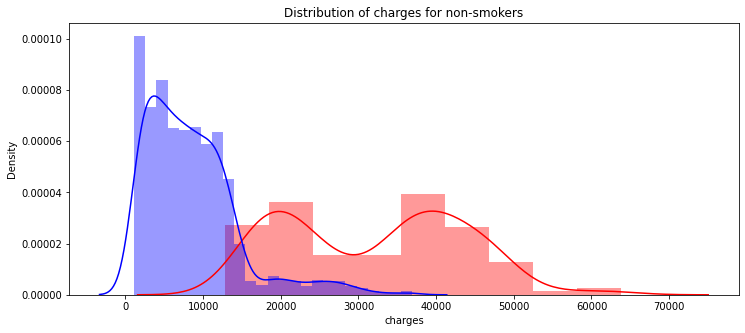

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot()
sns.distplot(df[(df.smoker == 1)]["charges"],color='red',ax=ax) #pandas özelliği, data.smoker==1 demek (içenler 1 içmeyenler 0) sigara içenleri al, onların masraflarını al demek.
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot()
sns.distplot(df[(df.smoker == 0)]['charges'],color='blue',ax=ax) #sigara içmeyenlerin masraflarının görselleştirilmesi
ax.set_title('Distribution of charges for non-smokers')

#ortak bir grafik üzerinden bu iki parametreyi görselleştirmek için distplot kullandık. 

In [ ]:
df[["smoker","charges"]].groupby(["smoker"], as_index= False).mean().sort_values(by="charges", ascending=False) # niteliklerimizi tablolaştırarak sonucu netleştirdik. Tablolaştırırken groupby ifadesinden yararlandık.
#ascending büyükten küçüğe sıralama için kullanıldı

,smoker,charges
1,1,32050.231832
0,0,8434.268298


Sigara kullanmayanların harcamaları 0-10000 arasında değişkenlik gösterirken, sigara kullananların harcamaları 0-35000 aralığında değişmektedir. Bu görselleştirme bize gösteriyor ki sigara kullanmayanların harcamaları kullananlara oranla çok daha az seviyelerdedir.

**SMOKER & REGİON İLİŞKİSİ**

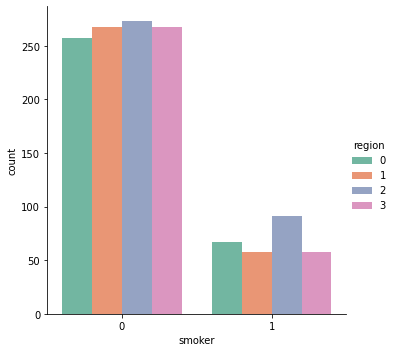

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'region', palette="Set2", data=df)

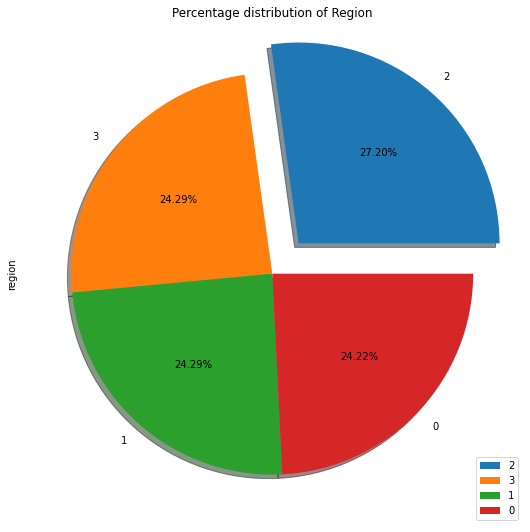

In [ ]:

plt.figure(figsize=(9,9.5))
df['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%',shadow=True)
plt.title('Percentage distribution of Region')
plt.show()

Görselleştirmemizin sonucunda 0,1,2 ve 3. bölgelerde sigara kullanımı oranları görülmektedir. 2. bölgede sigara kullanım oranı diğer bölgelere oranla daha fazladır. Aynı zamanda sigara kullanmayanların sayısı 2. bölgede diğer bölgelere oranla daha yüksektir.

**BMI & SEX İLİŞKİSİ**

Text(0.5, 1.0, 'Distribution of bmi for men')

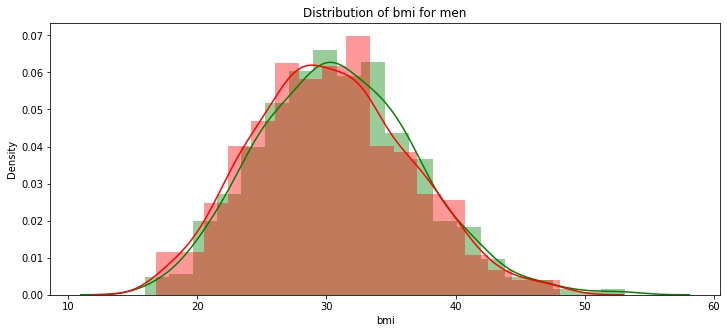

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot()
sns.distplot(df[(df.sex == 1)]["bmi"],color='green',ax=ax)
ax.set_title('Distribution of bmi for women')

ax=f.add_subplot()
sns.distplot(df[(df.sex == 0)]['bmi'],color='red',ax=ax)
ax.set_title('Distribution of bmi for men')

In [ ]:
df[["bmi","sex"]].groupby(["sex"], as_index= False).mean().sort_values(by="bmi", ascending=False)

,sex,bmi
1,1,30.943129
0,0,30.377749



Grafiğe ve tabloya bakarak kadın ve erkeklerin bmi dağılım oranlarının birbirine çok yakın olduğunu görebiliriz.


**EN ÇOK CHILDREN A SAHİP REGİON**

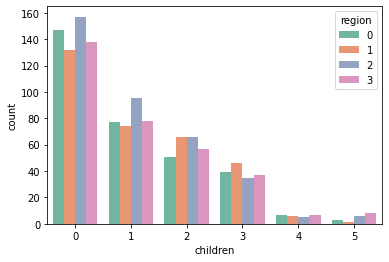

In [ ]:
ax = sns.countplot(x="children",hue="region", data=df, palette="Set2")  #countplot yöntemi, çubukları kullanarak her bir sınıflandırılmış kutudaki olay sayısını görüntülemek için kullanılır
#burada children sayısını net görebilmek için bu yöntemi tercih ettik

In [ ]:
color_pal = sns.color_palette("pastel")

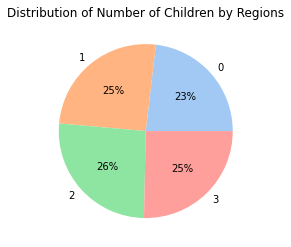

In [ ]:

df_children = df[["region", "children"]].groupby(["region"]).sum()
plt.pie(df_children.children, 
        colors=color_pal, 
        labels=df_children.index, 
        autopct = '%0.0f%%')
plt.title("Distribution of Number of Children by Regions")
plt.show()

In [ ]:
df[["children","region"]].groupby(["children"], as_index= False).mean().sort_values(by="region", ascending=False)

,children,region
5,5,2.055556
2,2,1.537500
1,1,1.537037
0,0,1.498258
4,4,1.480000
3,3,1.445860


Grafiğe bakarak 4 ve 5 çocuğa sahip verilerin 4 bölgede de sayısal olarak az olduğu sonucuna varabiliriz. En fazla çocuğa sahip olmayan bölgeyi 2.Bölge olarak belirleyebiliriz.

**AGE & BMI İLİŞKİSİ**


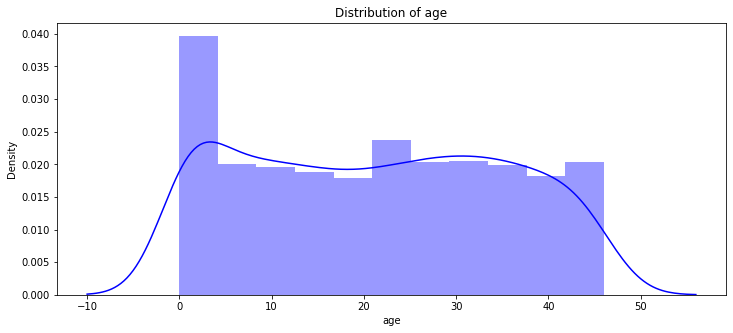

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'blue') 

Distplot ile görselleştirdik. Yaşın 0 dan küçük olduğu durumların da alındığını fark ettik. İkili analizi gerçekleştirirken bunu dikkate aldık.

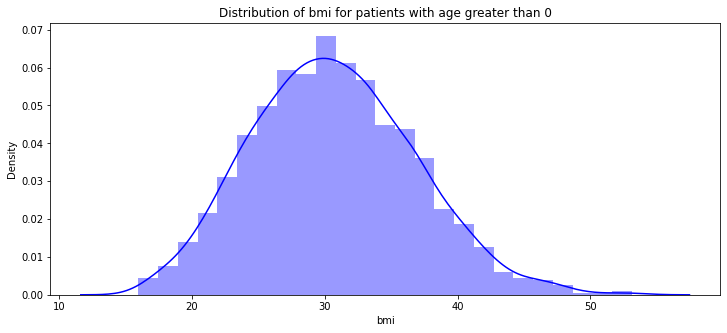

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi for patients with age greater than 0")
ax = sns.distplot(df[(df.age >= 0)]['bmi'], color = 'blue')

In [ ]:
df[["bmi","age"]].groupby(["age"], as_index= False).mean().sort_values(by="bmi", ascending=False)

,age,bmi
46,46,32.976136
34,34,32.936034
40,40,32.718200
43,43,32.548261
44,44,32.342609
37,37,31.950000
30,30,31.925690
45,45,31.923478
33,33,31.727069
38,38,31.600962


bmi dağılımının yaş üzerinde olan dağılımını distplot ile görselleştirdik. 30'lu yaş aralığında iki gözlemin de en yüksek değeri aldığı görülmektedir.

**BMI & CHILDREN İLİŞKİSİ**





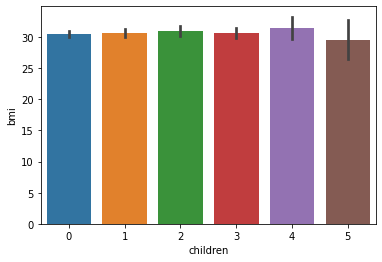

In [ ]:
sns.barplot(data=df, x="children", y="bmi") #çocuklu ailelerin dağılımının bmi değer aralığına göre gösterimini barplot ile görselleştirdik.

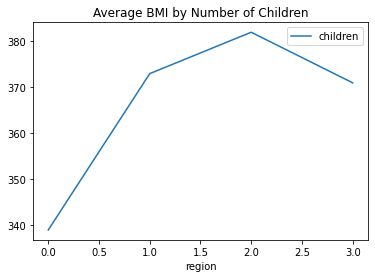

In [ ]:

df_children.plot() #line plot ile ayrıca bu ilişkiyi gözlemleyelim
plt.title("Average BMI by Number of Children")
plt.show()

In [ ]:
df[["children","bmi"]].groupby(["children"], as_index= False).mean().sort_values(by="bmi", ascending=False)

,children,bmi
4,4,31.391200
2,2,30.978104
3,3,30.684331
1,1,30.623148
0,0,30.550296
5,5,29.605000




Sayısal olarak 0,1,2 ve 3 çocuğa sahip kişiler bmi olarak 30 değerine sahiptir. 5 çocuklu kişilerin bmi oranı diğer ailelere göre düşüktür.

**BMI OUTLIER**

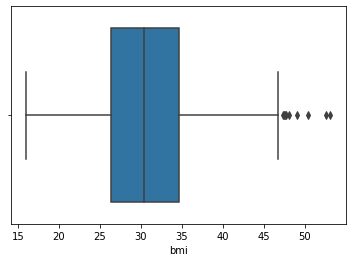

In [ ]:
sns.boxplot(data=df, x="bmi") # box plot ile aykırı değerlerin hangi aralıkta olduğunu görselleştirelim

In [ ]:
df_bmi = df['bmi']
Q1 = df_bmi.quantile(0.25)
print(f"Q1: {Q1}")
Q3 = df_bmi.quantile(0.75)
print(f"Q3: {Q1}")
IQR = Q3 - Q1
print(f"IQR: {Q1}")
lower_threshold = Q1 - 1.5*IQR
print(f"lower_threshold: {lower_threshold}")
upper_threshold = Q3 + 1.5*IQR
print(f"upper_threshold: {upper_threshold}")

Q1: 26.29625
Q3: 26.29625
IQR: 26.29625
lower_threshold: 13.7
upper_threshold: 47.290000000000006


In [ ]:
upper_outliers_count = df.query(f'bmi > {upper_threshold}')["bmi"].count()
print(f"Upper_outliers_count: {upper_outliers_count}")
lower_outliers_count = df.query(f'bmi < {lower_threshold}')["bmi"].count()
print(f"Lower_outliers_count: {lower_outliers_count}")

Upper_outliers_count: 9
Lower_outliers_count: 0


Aykırı değer hesabı IQR=Q3-Q1 ile hesaplanır. Yani üst ve alt çeyrekler arasındaki fark alınır. 
Yapılan görselleştirmede görüldüğü gibi aykırı değerler 45 ten büyük değerlerdir. Bu yüzden üst sınırda aykırı değer varken alt sınırda aykırı değere rastlanmamaktadır.

**BMI & CHARGES İLİŞKİSİ**

Text(0.5, 1.0, 'bmi and charges')

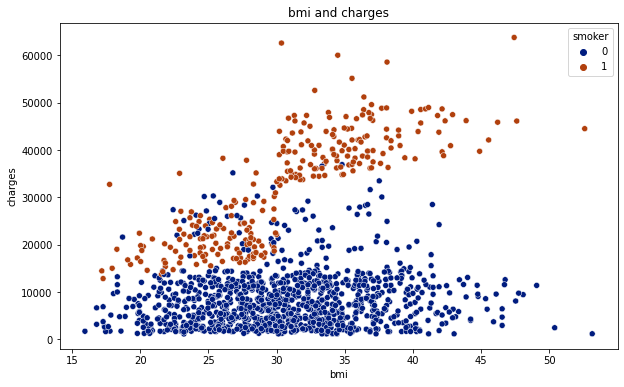

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='dark',hue='smoker')
ax.set_title('bmi and charges')

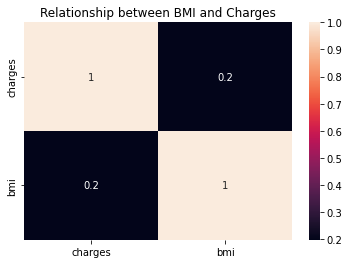

In [ ]:
corr_matrix_bcha = df[["charges", "bmi"]].corr()
sns.heatmap(corr_matrix_bcha, annot=True)
plt.title("Relationship between BMI and Charges")
plt.show()

Korelasyon grafiğine bakıldığında ilişkisel olarak oranın düşük olduğu gözlemlenir.


**REGION & SMOKER & BMI İLİŞKİSİ**

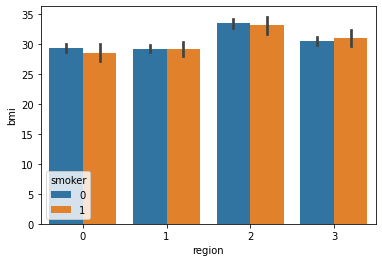

In [ ]:
sns.barplot(data=df, x="region", y="bmi", hue="smoker")


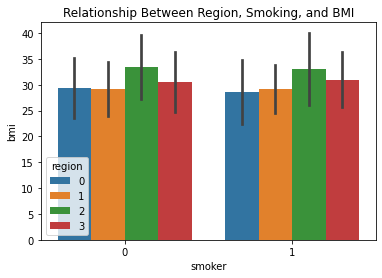

In [ ]:
sns.barplot(data=df, x="smoker", y="bmi", hue="region", ci="sd")
plt.title("Relationship Between Region, Smoking, and BMI")
plt.show()

Bölgere göre sigara içenlerin bmi oranı en yüksek olan 2. bölge olarak görülmektedir.
Sigara içmeyenlerin bmi oranı en yüksek olan bölge ise yine 2. bölgedir.
Sigara içenlerin bmi oranının en düşük olduğu bölge 0. bölge, sigara içmeyenlerin ise 0 ve 1. bölge olduğu anlaşılmaktadır.

Preparing for the Machine Learning Model


In [ ]:
df.head()  #yukarıda yapmış olduğumuz encoder işlemlerini görmek için tekrar bastırdık

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


Veri setimizi eğitim için bölelim

In [ ]:
names = []
for i in range(7):
    columns_ = df.columns[i]
    names.append(columns_)
names


['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

df = preprocessing.normalize(df)
df = pd.DataFrame(df, columns=names)
X = df.drop("charges",axis=1) #bağımsız değişken
y = df['charges'] #bağımlı değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
693,0.002550,0.000425,0.010053,0.000000,0.000000,0.000425
1297,0.002304,0.000000,0.006108,0.000461,0.000000,0.000461
634,0.003514,0.000106,0.004227,0.000106,0.000000,0.000319
1022,0.000687,0.000024,0.000855,0.000024,0.000024,0.000047
178,0.003173,0.000000,0.003275,0.000227,0.000000,0.000340


**Model Fitting**


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#gerekli kütüphaneleri entegre ettik

Modellerin RMSE ve R2 ile model başarı ölçümü

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"LinearRegressor \nR2 Score: {lr_r2} \nRMSE: {lr_rmse}")

LinearRegressor 
R2 Score: 0.8745969206206865 
RMSE: 2.1497361196453736e-05


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
pred = rfr.predict(X_test)
rfr_r2 = r2_score(y_test, pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"RandomForestRegressor \nR2 Score: {rfr_r2} \nRMSE: {rfr_rmse}")

RandomForestRegressor 
R2 Score: 0.9965119298378733 
RMSE: 3.585284792568268e-06


In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
knn_r2 = r2_score(y_test, pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"KNeighborsRegressor \nR2 Score: {knn_r2} \nRMSE: {knn_rmse}")

KNeighborsRegressor 
R2 Score: 0.9856749037977908 
RMSE: 7.265739560057801e-06


In [ ]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
pred = gbm.predict(X_test)
gbm_r2 = r2_score(y_test, pred)
gbm_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"GradientBoostingRegressor \nR2 Score: {gbm_r2} \nRMSE: {gbm_rmse}")

GradientBoostingRegressor 
R2 Score: 0.9957047611251886 
RMSE: 3.978549023229743e-06


In [ ]:
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)
pred = cart.predict(X_test)
cart_r2 = r2_score(y_test, pred)
cart_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"DecisionTreeRegressor \nR2 Score: {cart_r2} \nRMSE: {cart_rmse}")

DecisionTreeRegressor 
R2 Score: 0.9920877840371936 
RMSE: 5.399830397204872e-06


Cross validation ve MSE ile başarı ölçümü

In [ ]:
linear_model = LinearRegression().fit(X_train,y_train)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
rf_model = RandomForestRegressor().fit(X_train,y_train)
cart_model = DecisionTreeRegressor().fit(X_train,y_train)
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

model_list = [linear_model,knn_model,rf_model,cart_model,gbm_model]
rmse_list = []

for i in model_list:
    cross_val_score(i, X_train, y_train, cv = 10, scoring= "neg_mean_squared_error")
    mse = np.mean(-cross_val_score(i, X_train, y_train, cv = 10, scoring= "neg_mean_squared_error"))
    print(f"For {i} mse is: {mse}")

For LinearRegression() mse is: 7.747822419885856e-10
For KNeighborsRegressor() mse is: 3.4497221048721716e-10
For RandomForestRegressor() mse is: 2.2647429772950572e-10
For DecisionTreeRegressor() mse is: 1.53769304270158e-10
For GradientBoostingRegressor() mse is: 1.531633982971324e-10


Burada gerçekleştirdiğimiz MSE hesabını göz önüne alarak cross validation ve model fitting sonucunda GradientBoostingRegressor'un uygun olduğuna karar verildi. MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylendiği için bu karar verildi.

**Model Tunning**

GridSearchCV kullanılarak parametre optimizasyonu gerçekleştirildi.

In [ ]:
 GBR = GradientBoostingRegressor()
 parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
 grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
 grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.9747695182001309

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}


In [ ]:
pred = grid_GBR.predict(X_test)
print(f"GradientBoostingRegressor\nR2 Score: {r2_score(y_test, pred)} \nRMSE: {(mean_squared_error(y_test, pred)) ** 0.5}")

GradientBoostingRegressor
R2 Score: 0.9983316473266932 
RMSE: 2.4795620667319794e-06


Model değerlendirmesi

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
print(f"""
    XGBRegressor
    R2 Score: {r2_score(y_test, pred)}
    MSE: {mean_squared_error(y_test, pred)}
    RMSE: {(mean_squared_error(y_test, pred)) ** 0.5}
    MAE: {mean_absolute_error(y_test, pred)}
    RMAE: {(mean_absolute_error(y_test, pred)) ** 0.5}
    MSLE: {mean_squared_log_error(y_test, pred)}
    RMSLE: {(mean_squared_log_error(y_test, pred)) ** 0.5}
""")


    XGBRegressor
    R2 Score: 0.9983316473266932
    MSE: 6.148228042776165e-12
    RMSE: 2.4795620667319794e-06
    MAE: 5.552656422290366e-07
    RMAE: 0.0007451614873495789
    MSLE: 1.537629450387881e-12
    RMSLE: 1.2400118750995416e-06

